In [470]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

### Column Descriptions
- **date time**: Year-Month-Day Hour:Minute:Second
- **Appliances**: Energy use of appliances in Wh
- **lights**: Energy use of light fixtures in the house in Wh
- **T1**: Temperature in kitchen area, in Celsius
- **RH_1**: Humidity in kitchen area, in %
- **T2**: Temperature in living room area, in Celsius
- **RH_2**: Humidity in living room area, in %
- **T3**: Temperature in laundry room area, in Celsius
- **RH_3**: Humidity in laundry room area, in %
- **T4**: Temperature in office room, in Celsius
- **RH_4**: Humidity in office room, in %
- **T5**: Temperature in bathroom, in Celsius
- **RH_5**: Humidity in bathroom, in %
- **T6**: Temperature outside the building (north side), in Celsius
- **RH_6**: Humidity outside the building (north side), in %
- **T7**: Temperature in ironing room, in Celsius
- **RH_7**: Humidity in ironing room, in %
- **T8**: Temperature in teenager room 2, in Celsius
- **RH_8**: Humidity in teenager room 2, in %
- **T9**: Temperature in parents room, in Celsius
- **RH_9**: Humidity in parents room, in %
- **To**: Temperature outside (from Chievres weather station), in Celsius
- **Pressure**: Pressure (from Chievres weather station), in mm Hg
- **RH_out**: Humidity outside (from Chievres weather station), in %
- **Wind speed**: Wind speed (from Chievres weather station), in m/s
- **Visibility**: Visibility (from Chievres weather station), in km
- **Tdewpoint**: Dewpoint temperature (from Chievres weather station), in Celsius
- **rv1**: Random variable 1, nondimensional
- **rv2**: Random variable 2, nondimensional


In [471]:
# Loading and Exploring the data 
data = pd.read_csv('energydata_complete.csv',encoding = 'ISO-8859-1')

In [472]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [473]:
# Check for duplicates 
data.duplicated().sum()

np.int64(0)

In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [475]:
# This dataset has no missing values

In [476]:
# All columns are numerical except for date and time columns
# I ned to convert the date and time columns to datetime objects
data['date'] = pd.to_datetime(data['date'])

In [477]:
data['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

In [478]:
# It has year, month, day, hour and minute, so I need to extract the year, month, day and hour
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data = data.drop('date', axis=1)

In [479]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,17


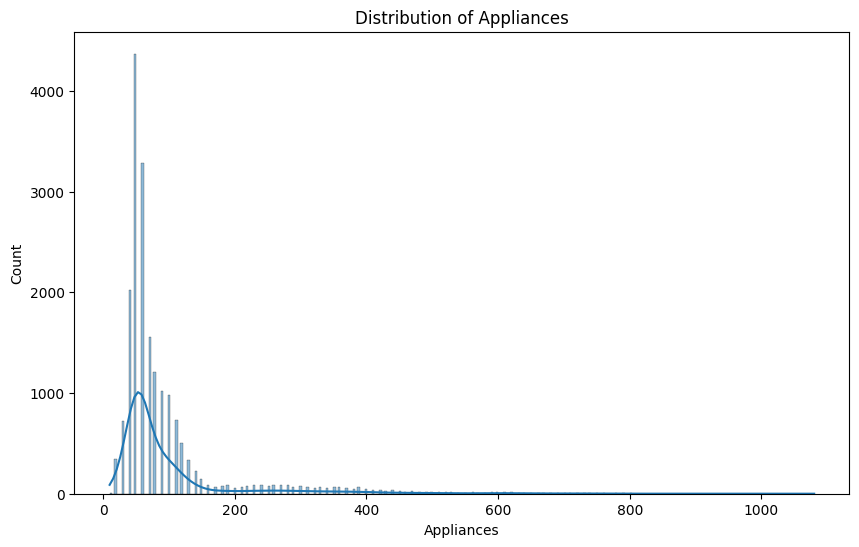

In [480]:
# There many columns have outliers, specifically the Appliances which is the target variable
# The target variable is distributed symmetrically.

# let's visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Appliances'], kde=True)
plt.title('Distribution of Appliances')
plt.show()


## <span style="color: #20C997;">Personal Analysis</span>
<li>Most appliances use small amounts of energy (less than 100).
<li>A few appliances use close to 1000, which makes the average higher.
<li>The kurtosis is very high, this means that the data has a lot of outliers.
<li>The mean is much higher than the median because some really big numbers.
<li> In nutshell data is not balanced.

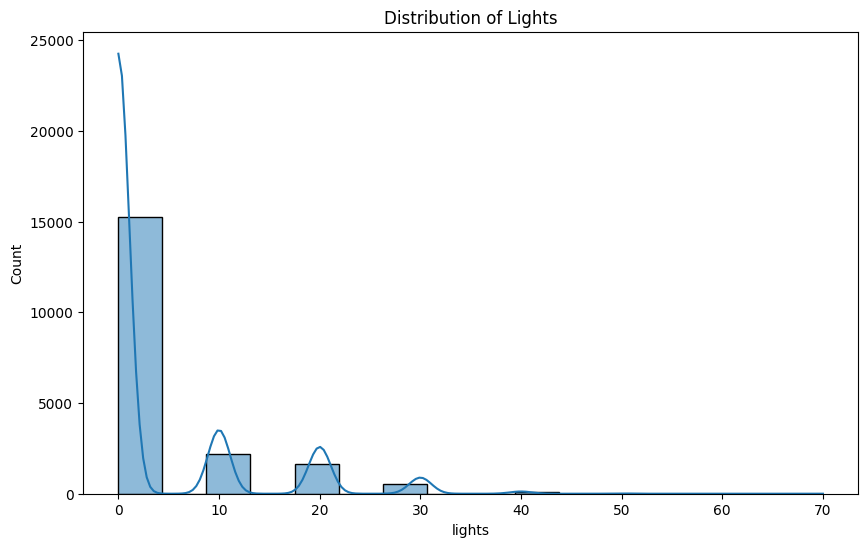

In [481]:
# visualizing the light column 
plt.figure(figsize=(10, 6))
sns.histplot(data['lights'], kde=True)
plt.title('Distribution of Lights')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li>Most of the time, the house spends little or no energy for lighting lights off.
<li>Medium energy use happens usually when some lights are turned on.
<li>Rarely, the energy goes to high levels (70 Wh)

In [482]:
# let's find outliers in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outliers, columns=["Outliers"])
outliers

,Outliers
Appliances,2138
lights,4483
T1,515
RH_1,146
T2,546
RH_2,235
T3,217
RH_3,15
T4,186
RH_4,0


In [483]:

def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps=eps, min_samples= min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [484]:

df_cluster_input = data[['Appliances']]
clusters = remove_outliers_DBSCAN(df_cluster_input,0.5,10)
clusters.value_counts().sort_values(ascending=False)

cluster
1     4368
0     3282
17    2019
2     1560
9     1205
      ... 
4       11
58      11
59      11
42      10
56      10
Name: count, Length: 63, dtype: int64

In [485]:

df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Index([  393,   431,   432,   443,   731,   732,   867,   868,  1031,  1079,
       ...
       15799, 15812, 15841, 16647, 17861, 18820, 18830, 19541, 19581, 19582],
      dtype='int64', length=120)

In [486]:

data['cluster']= df_cluster['cluster'].values
data.head()
     

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,cluster
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17,1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,17,1
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,17,0


In [487]:
# Appliance and lights are positive skewed, so I will use the median to impute the outliers

"""
imputer_median = SimpleImputer(strategy='median')

data['Appliances'] = data['Appliances'].clip(lower=Q1['Appliances'] - 1.5 * IQR['Appliances'], upper=Q3['Appliances'] + 1.5 * IQR['Appliances'])
data['Appliances'] = imputer_median.fit_transform(data[['Appliances']])

data['lights'] = data['lights'].clip(lower=Q1['lights'] - 1.5 * IQR['lights'], upper=Q3['lights'] + 1.5 * IQR['lights'])
data['lights'] = imputer_median.fit_transform(data[['lights']])

"""


"\nimputer_median = SimpleImputer(strategy='median')\n\ndata['Appliances'] = data['Appliances'].clip(lower=Q1['Appliances'] - 1.5 * IQR['Appliances'], upper=Q3['Appliances'] + 1.5 * IQR['Appliances'])\ndata['Appliances'] = imputer_median.fit_transform(data[['Appliances']])\n\ndata['lights'] = data['lights'].clip(lower=Q1['lights'] - 1.5 * IQR['lights'], upper=Q3['lights'] + 1.5 * IQR['lights'])\ndata['lights'] = imputer_median.fit_transform(data[['lights']])\n\n"

In [488]:
# For the rest of the columns which have outliers and normal distribution, I will impute the outliers with the mean value
# I need to filter the columns with outliers, before this I did not filers the columns with outliers, it worked for whole dataset.
#columns_outliers = outliers[outliers['Outliers'] > 0].index.tolist()
# I replaced outliers with median value for Appliances and lights, I filtered them out

"""
columns_impute = [col for col in columns_outliers if col not in ['Appliances', 'lights']]

imputer_mean = SimpleImputer(strategy='mean')
for col in columns_impute:
    data[col] = data[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])
    data[col] = imputer_mean.fit_transform(data[[col]])
    
"""


"\ncolumns_impute = [col for col in columns_outliers if col not in ['Appliances', 'lights']]\n\nimputer_mean = SimpleImputer(strategy='mean')\nfor col in columns_impute:\n    data[col] = data[col].clip(lower=Q1[col] - 1.5 * IQR[col], upper=Q3[col] + 1.5 * IQR[col])\n    data[col] = imputer_mean.fit_transform(data[[col]])\n    \n"

In [489]:
# I wanted to replaced the light column's outliers with the median value, but after imputing the outliers with the median value, All values got zero.
# Then I decided to replace the outliers with the mean value.
# But I got the same result.I removed the outliers from the light column, but the values are still zero.
# I wait for your feedback to solve this problem.


In [490]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,cluster
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17,1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,17,1
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,17,0


In [491]:
data.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
year           0
month          0
day            0
hour           0
cluster        0
dtype: int64

In [492]:
# since dataset is huge for my junk pc I will use the Undersampling method to reduce the size of the dataset.

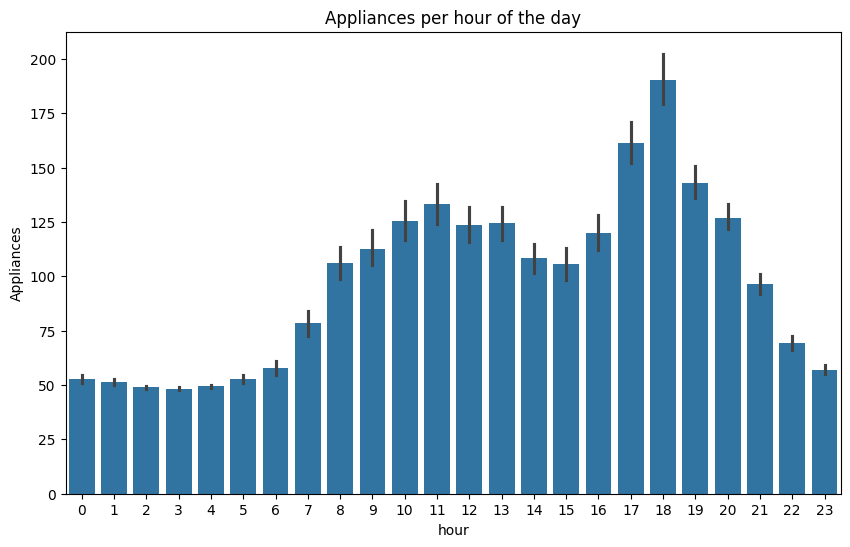

In [493]:
# Visualizing the energy consumption per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Appliances', data=data)
plt.title('Appliances per hour of the day')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
<li> Energy consumption is highest between 5 PM and 8 PM, it makes sense because people are at home during this time.
<li> Energy consumption is lowest from midnight to 5 AM, when people are  sleeping.